### 1.Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.Import Dataset from Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thobelasixpence","key":"475e19ebcf14e6e7a3d7b6a98b3e06a0"}'}

In [ ]:
# create a kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# permission for json files to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# place the copied API command
!kaggle datasets download -d uciml/sms-spam-collection-dataset


  0% 0.00/211k [00:00<?, ?B/s]

100% 211k/211k [00:00<00:00, 84.9MB/s]


In [ ]:
# import the zip library
!pip install zip_files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# open the zip files of the dataset
from zipfile import ZipFile
# open the zipped file
file_name="sms-spam-collection-dataset.zip"
with ZipFile(file_name,'r') as zip:
      zip.extractall()
      print('Done')

Done


In [ ]:
df = pd.read_csv(r'/content/spam.csv', encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4028,ham,"[Û_] anyway, many good evenings to u! s",NaN,NaN,NaN
4123,ham,"Hey sexy buns ! Have I told you ? I adore you,...",NaN,NaN,NaN
3353,ham,R u sure they'll understand that! Wine * good ...,NaN,NaN,NaN
4898,ham,"Haha, that was the first person I was gonna ask",NaN,NaN,NaN
226,spam,Will u meet ur dream partner soon? Is ur caree...,NaN,NaN,NaN


In [ ]:
# check size of the dataframe
df.size

27860

In [ ]:
# check the shape
df.shape

(5572, 5)

Tasks:

1.Data cleaning

2.Exploratory Data Analysis(EDA)

3.Preprocessing

4.Model building

5.Model Evaluation

6.Model improvement

7.Create website

8.Deploy

### 3.Data Cleaning

In [ ]:
# get info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# we do not need the unnamed columns, remove them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)


In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# rename the columns of the dataframes
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Since the target variable has 2 categories/binary outputs, we can encode them into [1,0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['target'] = le.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# check for null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check for duplicates
df.duplicated().sum()

403

In [ ]:
# drop the duplicated values
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

### 4.Exploratory Data Analysis(EDA)

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# lets check the value count of each class since we have two classes and see if there is probaly unbalanced data
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

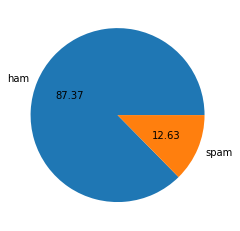

In [ ]:
# lets plot a pie chart to properly see the classes/categories
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [ ]:
# obviously the data is imbalance

In [ ]:
import re # this is for regular expressions when we are trying to manipulate the text
import nltk #library used for nlp products

In [ ]:
nltk.download('stopwords') # download the stopwords( which are words that do not provide any meaning and value to the text being
# analyzed for insights, basically are words like 'the, are, is etc', not the NOT word because the word can tell us whether the 
# review is positive or negative)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt') # tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
# collocations, and words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# create a new column for num of characters for each sentence, get a lenght of characters for each sentence
df['num_of_characters'] = df['text'].apply(len)
df.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
from nltk import word_tokenize, sent_tokenize # these are used to tokenize or seperate the sentences and words into tokens so they
# can be taken easily by the corpus

In [ ]:
# now create a column for number of words in a sentence, this is not gonna be the same number as characters, obviously
df['num_of_words'] = df['text'].apply(lambda x:len(word_tokenize(x)))
df.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# create column to get number of sentences
df['num_of_sentences'] = df['text'].apply(lambda x:len(sent_tokenize(x)))
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
# for the class-0, describe its data
df[df['target']==0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
# for the class-1, describe its data
df[df['target']==1][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


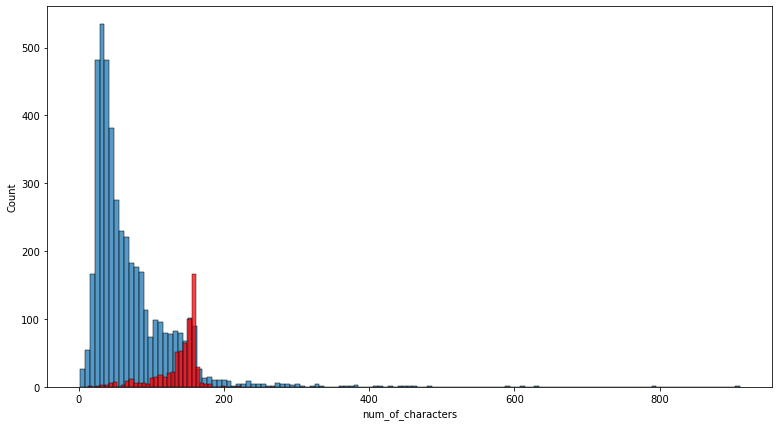

In [ ]:
# lets try to plot the num of characters that are spam and not
plt.figure(figsize=(13,7))
sns.histplot(df[df['target']==0]['num_of_characters'])
sns.histplot(df[df['target']==1]['num_of_characters'], color='red')
plt.show()

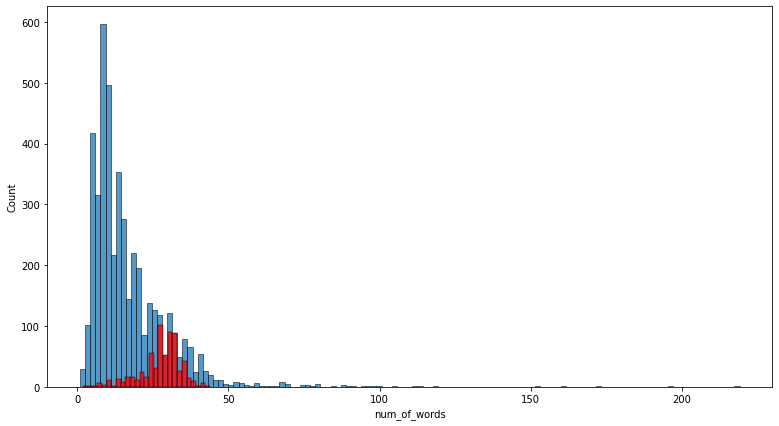

In [ ]:
# plot histogram for num of words that are spam and not
plt.figure(figsize=(13,7))
sns.histplot(df[df['target']==0]['num_of_words'])
sns.histplot(df[df['target']==1]['num_of_words'], color='red')
plt.show()

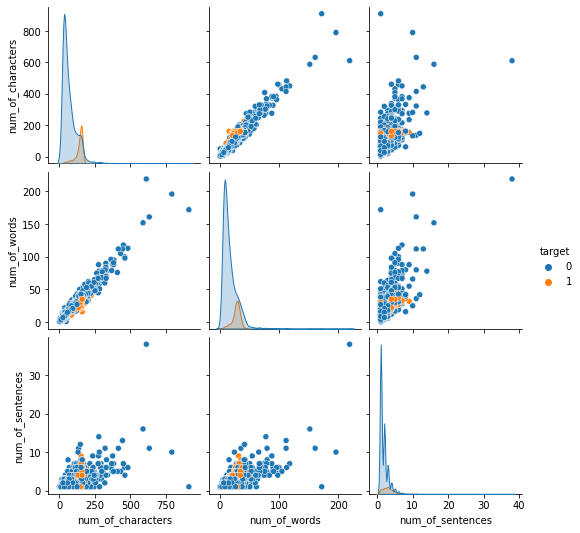

In [ ]:
# pair plot
sns.pairplot(df, hue='target')
plt.show()

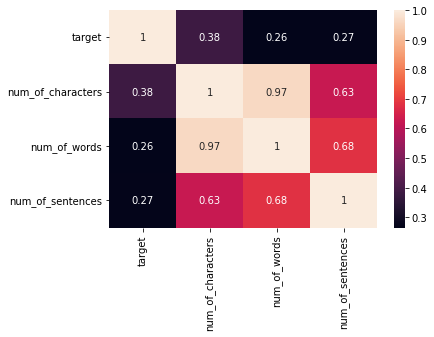

In [ ]:
#  correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

### 5.Preprocessing

In [ ]:
# lowercase
# Tokenization
# remove special characters
# remove stop words and punctuation
# apply porter stemming

In [ ]:
from nltk.stem import PorterStemmer # this library helps woth stemming process of finding the root of different words and place
# them under one column root of that word, to avoid having maultiple redundant words
ps = PorterStemmer()
from nltk.corpus import stopwords # here we are importing the stopwords to be used for the texts

In [ ]:
def transform_text(text):
  #lowercase
  text = text.lower()
  #tokenization
  text = word_tokenize(text)
  # remove special characters
  y=[] # list that will contain are alphanumeric(alphabetic and numerical)
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:] # take everything from start to last one, place in in text
  y.clear() # remove alphanumeric

  # remove stop words and punctuation
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:] 
  y.clear() 

  # apply porter stemming
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
import string

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
# apply the tranform function to the whole dataframe
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# create a word cloud to see the words that are mostly appearing in these sms's that are scam
from wordcloud import WordCloud
wc = WordCloud(width=500, min_font_size=10, background_color='white')

In [ ]:
spam_wordcloud = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

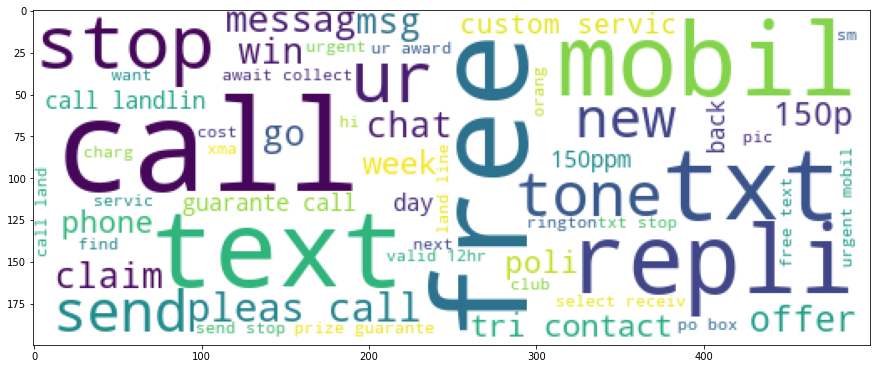

In [ ]:
plt.figure(figsize=(15,7))
plt.imshow(spam_wordcloud)
plt.show()

In [ ]:
# wordcloud for not scam sms words
normal_wordcloud = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

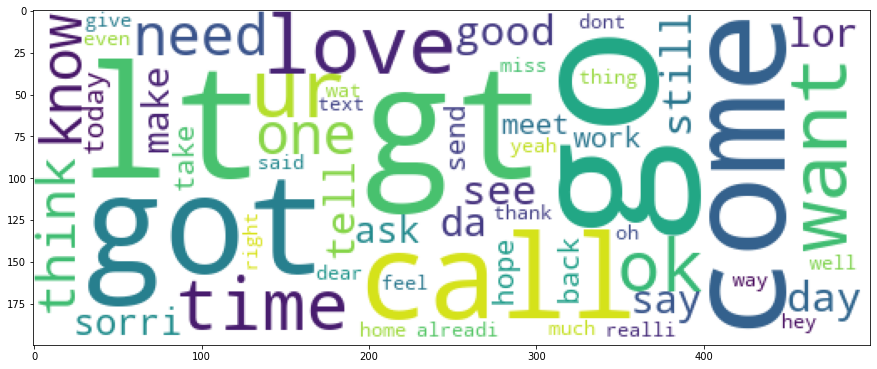

In [ ]:
plt.figure(figsize=(15,7))
plt.imshow(normal_wordcloud)
plt.show()

In [ ]:
# create a corpus for spam sms and dispay the words
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9883

In [ ]:
from collections import Counter

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


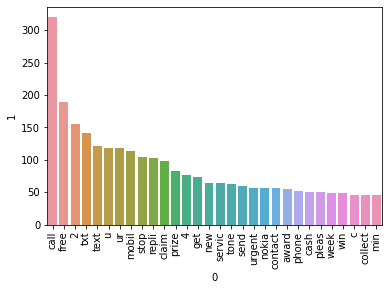

In [ ]:
#plot the corpus
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# create a corpus for not spam sms and dispay the words
normal_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    normal_corpus.append(word)

In [ ]:
len(normal_corpus)

34771

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


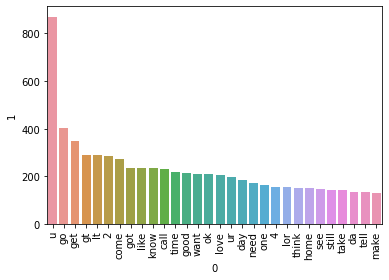

In [ ]:
#plot the corpus
sns.barplot(pd.DataFrame(Counter(normal_corpus).most_common(30))[0], pd.DataFrame(Counter(normal_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Text vectorization
# bag of words

### 6.Model building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [ ]:
X= tfid.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
# import all the naive bayes libraries
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
# create the models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
# fit the gaussian naive bayes
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.867504835589942
[[769 116]
 [ 21 128]]
0.5245901639344263


In [ ]:
# fit the multinomial naive bayes
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9671179883945842
[[885   0]
 [ 34 115]]
1.0


In [ ]:
# fit the bernouli naive bayes
bnb.fit(X_train, y_train)
y_pred_bnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9671179883945842
[[885   0]
 [ 34 115]]
1.0


In [ ]:
# lets try other classification models and see
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# create the above models
mnb = MultinomialNB()
log = LogisticRegression(penalty='l2', solver= 'liblinear')
svc = SVC(kernel='rbf', gamma=1.0)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rft = RandomForestClassifier(random_state=0, n_estimators=50)
abc = AdaBoostClassifier(random_state=0, n_estimators=50)
bc = BaggingClassifier(random_state=0,  n_estimators=50)
etc = ExtraTreesClassifier(random_state=0, n_estimators=50)
gbc = GradientBoostingClassifier(random_state=0, n_estimators=50)
xgb = XGBClassifier(random_state=0, n_estimators=50)

In [ ]:
# fit all the models using the training data
def train_classifier_model(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  #confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [ ]:
clfs_dict = {
    'MNB': mnb,
    'LOG': log,
    'SVC': svc,
    'KNN': knn,
    'DTC': dtc,
    'RFT':rft,
    'AdaBC':abc,
    'BagC':bc,
    'ExtaTC':etc,
    'GradientBC':gbc,
    'XtremeGB':xgb
}

In [ ]:
# list that will contain the scores
accuracy_list =[]
precision_list =[]

# fitting all the models
for name,clf in clfs_dict.items():
  cur_accuracy, cur_precision = train_classifier_model(clf,X_train,y_train,X_test, y_test)
  print("For : ", name)
  print("Accuracy = ",cur_accuracy)
  print("Precision = ",cur_precision)

  accuracy_list.append(cur_accuracy)
  precision_list.append(cur_precision)


For :  MNB
Accuracy =  0.9671179883945842
Precision =  1.0
For :  LOG
Accuracy =  0.9535783365570599
Precision =  0.9809523809523809
For :  SVC
Accuracy =  0.9729206963249516
Precision =  0.984
For :  KNN
Accuracy =  0.9032882011605415
Precision =  1.0
For :  DTC
Accuracy =  0.9313346228239845
Precision =  0.8482142857142857
For :  RFT
Accuracy =  0.97678916827853
Precision =  1.0
For :  AdaBC
Accuracy =  0.9671179883945842
Precision =  0.96
For :  BagC
Accuracy =  0.9574468085106383
Precision =  0.8832116788321168
For :  ExtaTC
Accuracy =  0.97678916827853
Precision =  0.9770992366412213
For :  GradientBC
Accuracy =  0.9584139264990329
Precision =  0.9649122807017544
For :  XtremeGB
Accuracy =  0.9487427466150871
Precision =  0.9705882352941176


### 7.Model Evaluation

In [ ]:
# create a dataframe to  plot rge results
performance_df = pd.DataFrame({'Algorithm':clfs_dict.keys(),'Accuracy':accuracy_list,'Precision':precision_list}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
0,MNB,0.967118,1.000000
3,KNN,0.903288,1.000000
5,RFT,0.976789,1.000000
2,SVC,0.972921,0.984000
1,LOG,0.953578,0.980952
8,ExtaTC,0.976789,0.977099
10,XtremeGB,0.948743,0.970588
9,GradientBC,0.958414,0.964912
6,AdaBC,0.967118,0.960000
7,BagC,0.957447,0.883212


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,MNB,Accuracy,0.967118
1,KNN,Accuracy,0.903288
2,RFT,Accuracy,0.976789
3,SVC,Accuracy,0.972921
4,LOG,Accuracy,0.953578
5,ExtaTC,Accuracy,0.976789
6,XtremeGB,Accuracy,0.948743
7,GradientBC,Accuracy,0.958414
8,AdaBC,Accuracy,0.967118
9,BagC,Accuracy,0.957447


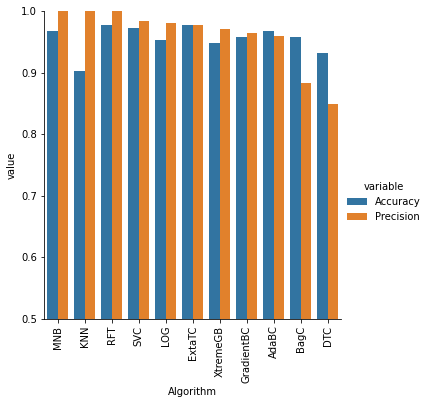

In [ ]:
# plot the results
sns.catplot(x='Algorithm', y='value', hue ='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### 8.Model Improvement

In [ ]:
#  change the max features of TFidf
temp_df1 = pd.DataFrame({'Algorithm':clfs_dict.keys(),'Accuracy_max_ft_3000':accuracy_list,'Precision_max_ft_3000':precision_list}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df2 = pd.DataFrame({'Algorithm':clfs_dict.keys(),'Accuracy_scaling':accuracy_list,'Precision_scaling':precision_list}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df1, on='Algorithm')

In [ ]:
new_scaled_df = new_df.merge(temp_df2, on='Algorithm')

In [ ]:
new_scaled_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,MNB,0.967118,1.000000,0.967118,1.000000,0.967118,1.000000
1,KNN,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000
2,RFT,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
3,SVC,0.972921,0.984000,0.972921,0.984000,0.972921,0.984000
4,LOG,0.953578,0.980952,0.953578,0.980952,0.953578,0.980952
5,ExtaTC,0.976789,0.977099,0.976789,0.977099,0.976789,0.977099
6,XtremeGB,0.948743,0.970588,0.948743,0.970588,0.948743,0.970588
7,GradientBC,0.958414,0.964912,0.958414,0.964912,0.958414,0.964912
8,AdaBC,0.967118,0.960000,0.967118,0.960000,0.967118,0.960000
9,BagC,0.957447,0.883212,0.957447,0.883212,0.957447,0.883212


In [ ]:
temp_chars_df = pd.DataFrame({'Algorithm':clfs_dict.keys(),'Accuracy_num_chars':accuracy_list,'Precision_num_chars':precision_list}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
final_df = new_scaled_df.merge(temp_chars_df, on='Algorithm')

In [ ]:
final_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,MNB,0.967118,1.000000,0.967118,1.000000,0.967118,1.000000,0.967118,1.000000
1,KNN,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000
2,RFT,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
3,SVC,0.972921,0.984000,0.972921,0.984000,0.972921,0.984000,0.972921,0.984000
4,LOG,0.953578,0.980952,0.953578,0.980952,0.953578,0.980952,0.953578,0.980952
5,ExtaTC,0.976789,0.977099,0.976789,0.977099,0.976789,0.977099,0.976789,0.977099
6,XtremeGB,0.948743,0.970588,0.948743,0.970588,0.948743,0.970588,0.948743,0.970588
7,GradientBC,0.958414,0.964912,0.958414,0.964912,0.958414,0.964912,0.958414,0.964912
8,AdaBC,0.967118,0.960000,0.967118,0.960000,0.967118,0.960000,0.967118,0.960000
9,BagC,0.957447,0.883212,0.957447,0.883212,0.957447,0.883212,0.957447,0.883212


In [ ]:
# voting classifier
svc = SVC(kernel='sigmoid',gamma=1.0, probability=True)
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('svm',svc),('mnb',mnb),('etc',etc)], voting='soft')

In [ ]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=0))],
                 voting='soft')

In [ ]:
y_pred_voting = voting_clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred_voting))
print("Precision: ", precision_score(y_test,y_pred_voting))

Accuracy:  0.9825918762088974
Precision:  0.9924812030075187


In [ ]:
# Apply stacking 
estimators =[('svm',svc),('mnb',mnb),('etc',etc)]
final_estimator = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
stacking_clf.fit(X_train,y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('mnb', MultinomialNB()),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=0))],
                   final_estimator=RandomForestClassifier())

In [ ]:
y_pred_stacking = stacking_clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred_stacking))
print("Precision: ", precision_score(y_test,y_pred_stacking))

Accuracy:  0.9825918762088974
Precision:  0.9924812030075187


In [ ]:
# save the model
import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_file = open('/content/drive/MyDrive/SMS Spam Model Data/spam_clf_model.pkl','wb')
vectorizer_file = open('/content/drive/MyDrive/SMS Spam Model Data/vectorizer.pkl','wb')
pickle.dump(tfid, vectorizer_file)
pickle.dump(mnb,model_file)

### 9.Create Website

### 10.Deploy